In [466]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import interpolate
from numpy.lib.polynomial import poly1d
from numpy.linalg import norm
from scipy.sparse import diags

In [467]:
def f(x):
    return np.abs(np.sin(x)) - np.abs(np.cos(x))

In [468]:
def x_cheb_m(m):
    return 0.5 * ((b - a) * np.cos((2*m + 1) / (2*n+2) * np.pi) + a + b)

In [469]:
def lagrange(x, y):
    M = len(x)
    p = poly1d(0.0)
    for j in range(M):
        pt = poly1d(y[j])
        for k in range(M):
            if k == j:
                continue
            fac = x[j]-x[k]
            pt *= poly1d([1.0, -x[k]])/fac
        p += pt
    return p

In [470]:
def cubic_spline(xi, yi, x0):
    n = len(xi)
    hsp = xi[1:] - xi[:-1]
    Bdop = (yi[1:] - yi[:-1]) / hsp
    beta = 2 * (hsp[:-1] + hsp[1:])

    T = diags([hsp[:-1], beta, hsp[1:]], [-1, 0, 1], shape=(n-2, n-2))

    Cdop = np.zeros(n)
    Cdop[1:-1] = np.linalg.solve(T.todense(), 6 * (Bdop[1:] - Bdop[:-1]))

    a = yi[:-1]
    b = Bdop - hsp * (2 * Cdop[:-1] + Cdop[1:]) / 6
    c = Cdop / 2
    d = (Cdop[1:] - Cdop[:-1]) / (6 * hsp)
    
    ysp = np.zeros_like(x0)
    for i in range(n-1):
        mask = (x0 >= xi[i]) & (x0 <= xi[i+1])
        ysp[mask] = a[i] + b[i] * (x0[mask] - xi[i]) + c[i] * (x0[mask] - xi[i])**2 + d[i] * (x0[mask] - xi[i])**3
    
    return ysp, a, b, c, d

In [471]:
a = 0
b = np.pi
n = 6
idx = 43 % n
h = (b - a) / n
x_ = np.linspace(a, b, 100)
y_ = f(x_)
print(f'idx: {idx}')

idx: 1


In [472]:
print(f'x = {np.round(x := np.linspace(a, b, n+1), 3)}')
print(f'x intermediate = {np.round(x_interm := np.linspace(a + 0.75*h, b-h*0.25, n), 3)}')
print(f'x chebyshev = {np.round(x_cheb := np.sort(np.array([x_cheb_m(m) for m in range(n+1)])), 3)}')
print(f'y = {np.round(y := f(x), 3)}')
print(f'y intermediate = {np.round(y_interm := f(x_interm), 3)}')
print(f'y chebyshev = {np.round(y_cheb := f(x_cheb), 3)}')

x = [0.    0.524 1.047 1.571 2.094 2.618 3.142]
x intermediate = [0.393 0.916 1.44  1.963 2.487 3.011]
x chebyshev = [0.039 0.343 0.889 1.571 2.252 2.799 3.102]
y = [-1.    -0.366  0.366  1.     0.366 -0.366 -1.   ]
y intermediate = [-0.541  0.185  0.861  0.541 -0.185 -0.861]
y chebyshev = [-0.96  -0.606  0.147  1.     0.147 -0.606 -0.96 ]


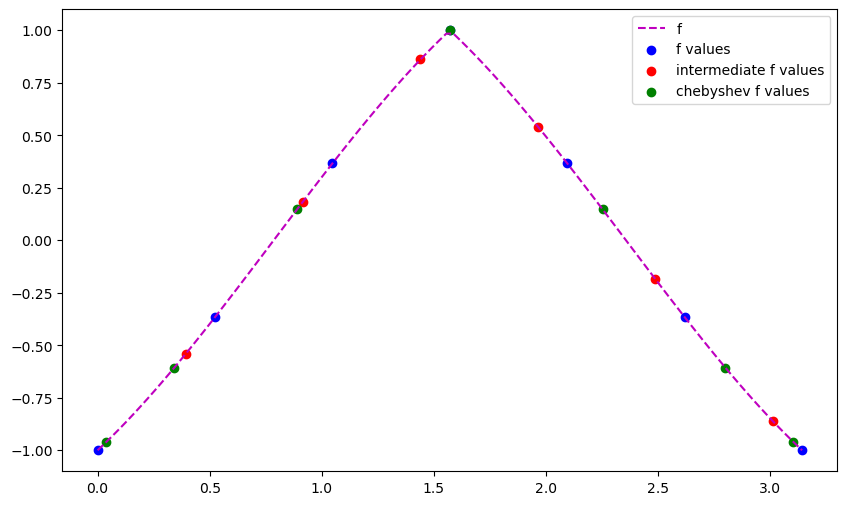

In [473]:
plt.figure(figsize=(10, 6))
plt.plot(x_, y_, '--', color='m', label='f')
plt.scatter(x, y, color='b', label='f values');
plt.scatter(x_interm, y_interm, color='r', label='intermediate f values');
plt.scatter(x_cheb, y_cheb, color='g', label='chebyshev f values');
plt.legend();

In [474]:
cs = interpolate.CubicSpline(x, y)
y_interm_cs = cs(x_interm)
print(f'absolute error: {norm(y_interm_cs - y_interm)}')
print(f'relative error: {norm(y_interm_cs - y_interm)/norm(y_interm)*100}%')

absolute error: 0.10152993549942392
relative error: 6.946456589095653%


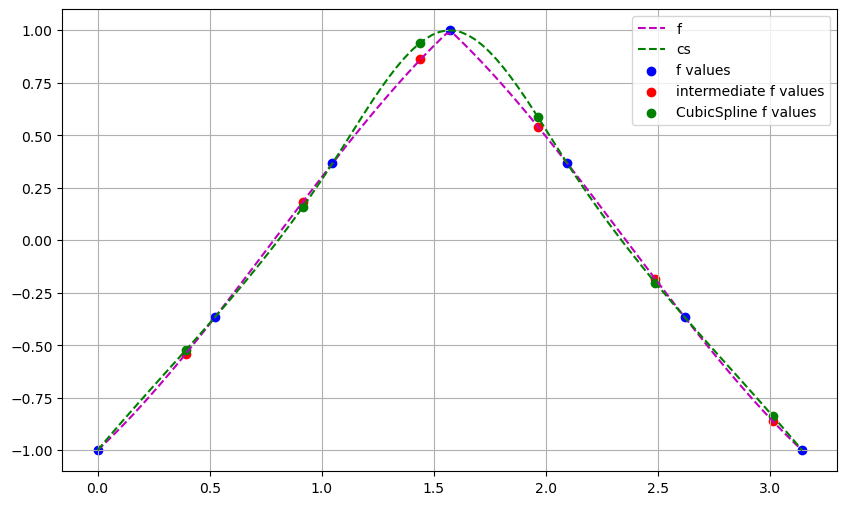

In [475]:
plt.figure(figsize=(10, 6))
plt.plot(x_, y_, '--', color='m', label='f')
plt.plot(x_, cs(x_), '--', color='g', label='cs')
plt.scatter(x, y, color='b', label='f values')
plt.scatter(x_interm, y_interm, color='r', label='intermediate f values')
plt.scatter(x_interm, y_interm_cs, color='g', label='CubicSpline f values')
plt.grid()
plt.legend();

In [476]:
cs = interpolate.CubicSpline(x_cheb, y_cheb)
y_interm_cs = cs(x_interm)
print(f'absolute error: {norm(y_interm_cs - y_interm)}')
print(f'relative error: {norm(y_interm_cs - y_interm)/norm(y_interm)*100}%')

absolute error: 0.13268483031262382
relative error: 9.07800649399008%


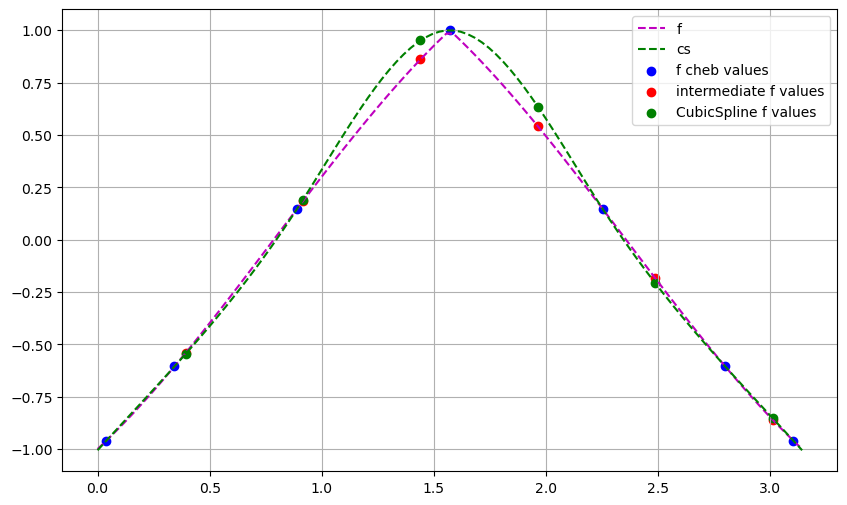

In [477]:
plt.figure(figsize=(10, 6))
plt.plot(x_, y_, '--', color='m', label='f')
plt.plot(x_, cs(x_), '--', color='g', label='cs')
plt.scatter(x_cheb, y_cheb, color='b', label='f cheb values')
plt.scatter(x_interm, y_interm, color='r', label='intermediate f values')
plt.scatter(x_interm, y_interm_cs, color='g', label='CubicSpline f values')
plt.grid()
plt.legend();

In [478]:
lp = interpolate.lagrange(x, y)
y_interm_lp = lp(x_interm)
print(f'absolute error: {norm(y_interm_lp - y_interm)}')
print(f'relative error: {norm(y_interm_lp - y_interm)/norm(y_interm)*100}%')

absolute error: 0.3480022354168786
relative error: 23.809553402555927%


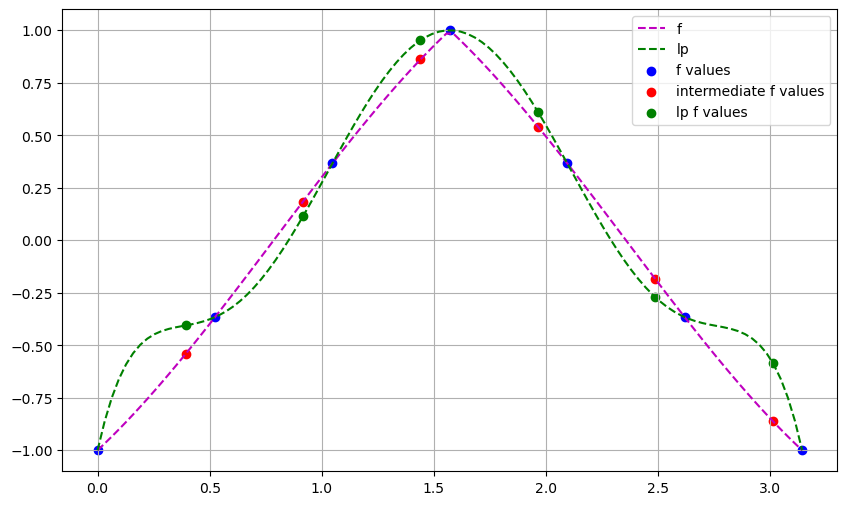

In [479]:
plt.figure(figsize=(10, 6))
plt.plot(x_, y_, '--', color='m', label='f')
plt.plot(x_, lp(x_), '--', color='g', label='lp')
plt.scatter(x, y, color='b', label='f values')
plt.scatter(x_interm, y_interm, color='r', label='intermediate f values')
plt.scatter(x_interm, y_interm_lp, color='g', label='lp f values')
plt.grid()
plt.legend();

In [480]:
lp = interpolate.lagrange(x_cheb, y_cheb)
y_interm_lp = lp(x_interm)
print(f'absolute error: {norm(y_interm_lp - y_interm)}')
print(f'relative error: {norm(y_interm_lp - y_interm)/norm(y_interm)*100}%')

absolute error: 0.18418391314049629
relative error: 12.60146133991665%


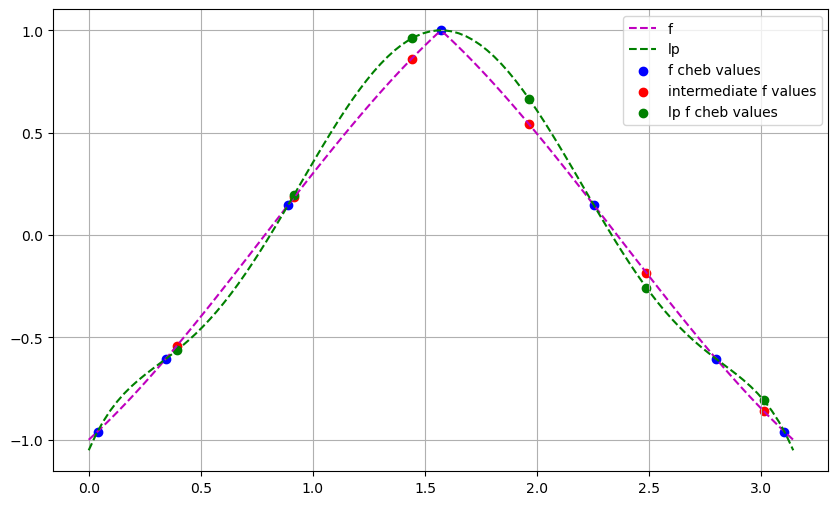

In [481]:
plt.figure(figsize=(10, 6))
plt.plot(x_, y_, '--', color='m', label='f')
plt.plot(x_, lp(x_), '--', color='g', label='lp')
plt.scatter(x_cheb, y_cheb, color='b', label='f cheb values')
plt.scatter(x_interm, y_interm, color='r', label='intermediate f values')
plt.scatter(x_interm, y_interm_lp, color='g', label='lp f cheb values')
plt.grid()
plt.legend();

In [482]:
print(f'intemediate point {idx} value: {y_interm[idx]}\n\n')

interval1 = slice(1,idx+2)
lp1 = lagrange(x[interval1], y[interval1])
y_interm_lp1 = lp1(x_interm[idx])
print(f'1 degree polinom \n{lp1}')
print(f'value in intemediate point {idx}, y = {y_interm_lp1}')
print(f'absolute error: {abs(y_interm_lp1-y_interm[idx])}')
print(f'relative error: {abs(y_interm_lp1-y_interm[idx])/y_interm[idx]*100}%\n\n')

interval2 = slice(0,idx+2)
lp2 = lagrange(x[interval2], y[interval2])
y_interm_lp2 = lp2(x_interm[idx])
print(f'2 degree polinom\n{lp2}')
print(f'value in intemediate point {idx}, y = {y_interm_lp2}')
print(f'absolute error: {abs(y_interm_lp2-y_interm[idx])}')
print(f'relative error: {abs(y_interm_lp2-y_interm[idx])/y_interm[idx]*100}%\n\n')

interval3 = slice(0,idx+3)
lp3 = lagrange(x[interval3], y[interval3])
y_interm_lp3 = lp1(x_interm[idx])
print(f'3 degree polinom\n{lp3}')
print(f'value in intemediate point {idx}, y = {y_interm_lp3}')
print(f'absolute error: {abs(y_interm_lp3-y_interm[idx])}')
print(f'relative error: {abs(y_interm_lp3-y_interm[idx])/y_interm[idx]*100}%\n\n')

interval4 = slice(0, -1)
lpf = lagrange(x[interval4], y[interval4])
y_interm_lpf = lpf(x_interm[idx])
print(f'n-1 degree polinom\n{lpf}')
print(f'value in intemediate point {idx}, y = {y_interm_lpf}')
print(f'absolute error: {abs(y_interm_lpf-y_interm[idx])}')
print(f'relative error: {abs(y_interm_lpf-y_interm[idx])/y_interm[idx]*100}%\n\n')

intemediate point 1 value: 0.1845919112825145


1 degree polinom 
 
1.398 x - 1.098
value in intemediate point 1, y = 0.1830127018922194
absolute error: 0.0015792093902950999
relative error: 0.8555138626189037%


2 degree polinom
        2
0.1789 x + 1.117 x - 1
value in intemediate point 1, y = 0.17381805707784603
absolute error: 0.010773854204668476
relative error: 5.836579799089512%


3 degree polinom
         3          2
-0.2277 x + 0.5366 x + 0.9923 x - 1
value in intemediate point 1, y = 0.1830127018922194
absolute error: 0.0015792093902950999
relative error: 0.8555138626189037%


n-1 degree polinom
        5         4         3         2
0.7016 x - 4.214 x + 8.201 x - 6.127 x + 2.723 x - 1
value in intemediate point 1, y = 0.1424224291978915
absolute error: 0.04216948208462301
relative error: 22.84470743687322%




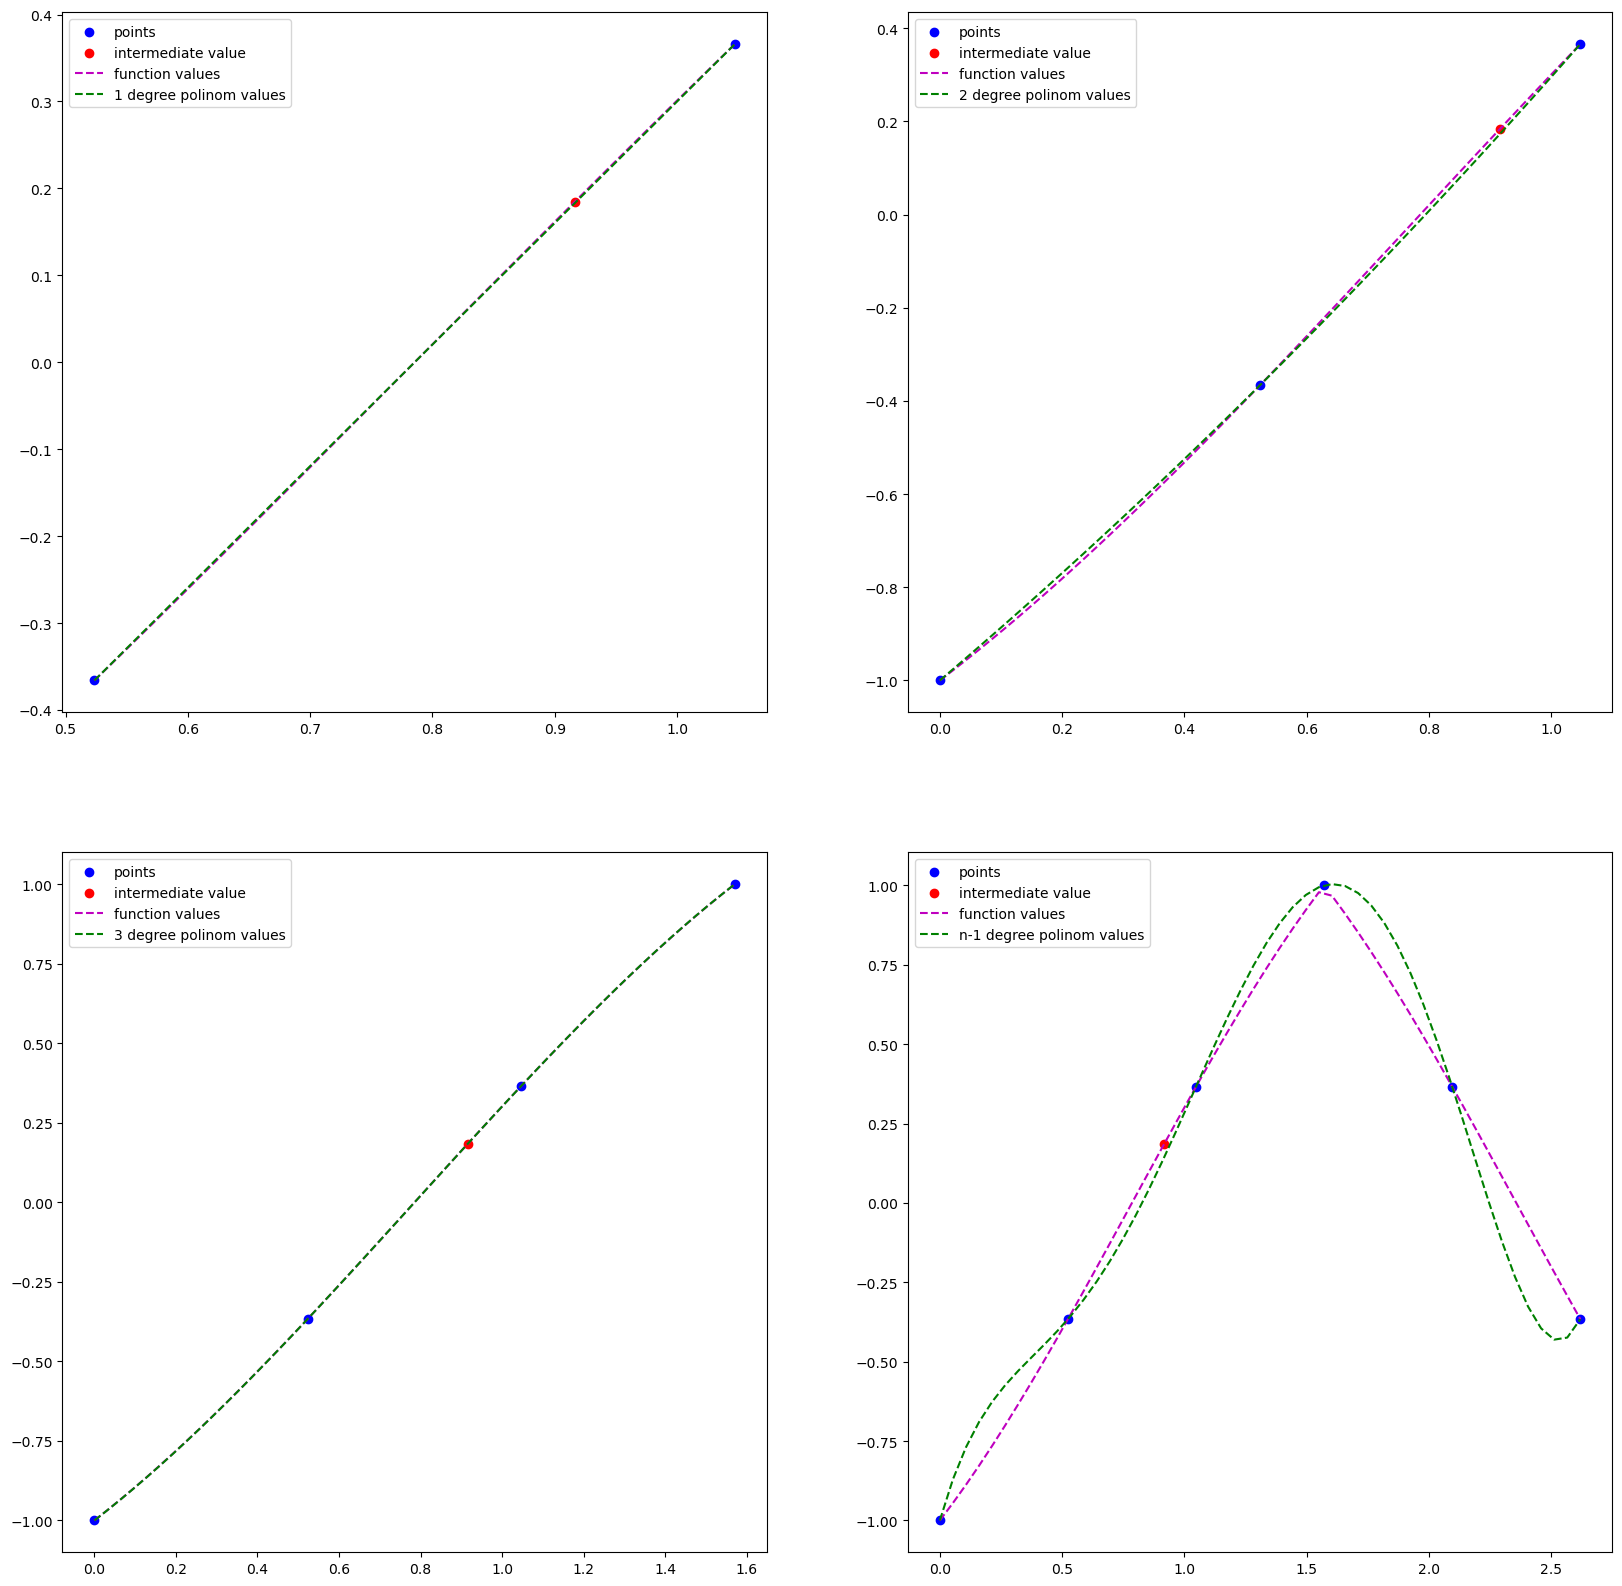

In [483]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
axs[0, 0].scatter(x[interval1], y[interval1], color='b', label='points')
axs[0, 0].scatter(x_interm[idx], y_interm[idx], color='r', label='intermediate value')
axs[0, 0].plot(x_t:=np.linspace(x[1], x[idx+1]), f(x_t), '--', color='m', label='function values')
axs[0, 0].plot(x_t, lp1(x_t), '--', color='g', label='1 degree polinom values')
axs[0, 0].legend();

axs[0, 1].scatter(x[interval2], y[interval2], color='b', label='points')
axs[0, 1].scatter(x_interm[idx], y_interm[idx], color='r', label='intermediate value')
axs[0, 1].plot(x_t:=np.linspace(x[0], x[idx+1]), f(x_t), '--', color='m', label='function values')
axs[0, 1].plot(x_t, lp2(x_t), '--', color='g', label='2 degree polinom values')
axs[0, 1].legend();

axs[1, 0].scatter(x[interval3], y[interval3], color='b', label='points')
axs[1, 0].scatter(x_interm[idx], y_interm[idx], color='r', label='intermediate value')
axs[1, 0].plot(x_t:=np.linspace(x[0], x[idx+2]), f(x_t), '--', color='m', label='function values')
axs[1, 0].plot(x_t, lp3(x_t), '--', color='g', label='3 degree polinom values')
axs[1, 0].legend();

axs[1, 1].scatter(x[interval4], y[interval4], color='b', label='points')
axs[1, 1].scatter(x_interm[idx], y_interm[idx], color='r', label='intermediate value')
axs[1, 1].plot(x_t:=np.linspace(x[0], x[-2]), f(x_t), '--', color='m', label='function values')
axs[1, 1].plot(x_t, lpf(x_t), '--', color='g', label='n-1 degree polinom values')
axs[1, 1].legend();

In [484]:
print(f'intemediate point {idx} value: {y_interm[idx]}\n\n')

interval1 = slice(2,idx+3)
lp1 = lagrange(x_cheb[interval1], y_cheb[interval1])
y_interm_lp1 = lp1(x_interm[idx])
print(f'1 degree polinom \n{lp1}')
print(f'value in intemediate point {idx}, y = {y_interm_lp1}')
print(f'absolute error: {abs(y_interm_lp1-y_interm[idx])}')
print(f'relative error: {abs(y_interm_lp1-y_interm[idx])/y_interm[idx]*100}%\n\n')

interval2 = slice(1,idx+3)
lp2 = lagrange(x_cheb[interval2], y_cheb[interval2])
y_interm_lp2 = lp2(x_interm[idx])
print(f'2 degree polinom\n{lp2}')
print(f'value in intemediate point {idx}, y = {y_interm_lp2}')
print(f'absolute error: {abs(y_interm_lp2-y_interm[idx])}')
print(f'relative error: {abs(y_interm_lp2-y_interm[idx])/y_interm[idx]*100}%\n\n')

interval3 = slice(0,idx+3)
lp3 = lagrange(x_cheb[interval3], y_cheb[interval3])
y_interm_lp3 = lp1(x_interm[idx])
print(f'3 degree polinom\n{lp3}')
print(f'value in intemediate point {idx}, y = {y_interm_lp3}')
print(f'absolute error: {abs(y_interm_lp3-y_interm[idx])}')
print(f'relative error: {abs(y_interm_lp3-y_interm[idx])/y_interm[idx]*100}%\n\n')

intervalf = slice(0,-1)
lpf = lagrange(x_cheb[intervalf], y_cheb[intervalf])
y_interm_lpf = lpf(x_interm[idx])
print(f'n-1 degree polinom\n{lpf}')
print(f'value in intemediate point {idx}, y = {y_interm_lpf}')
print(f'absolute error: {abs(y_interm_lpf-y_interm[idx])}')
print(f'relative error: {abs(y_interm_lpf-y_interm[idx])/y_interm[idx]*100}%\n\n')

intemediate point 1 value: 0.1845919112825145


1 degree polinom 
 
1.252 x - 0.9669
value in intemediate point 1, y = 0.18047316602495922
absolute error: 0.00411874525755529
relative error: 2.2312707143768753%


2 degree polinom
         2
-0.1014 x + 1.502 x - 1.109
value in intemediate point 1, y = 0.18226808869766042
absolute error: 0.002323822584854085
relative error: 1.2588972987540703%


3 degree polinom
         3          2
-0.2272 x + 0.5353 x + 0.9928 x - 0.9998
value in intemediate point 1, y = 0.18047316602495922
absolute error: 0.00411874525755529
relative error: 2.2312707143768753%


n-1 degree polinom
        5         4         3         2
0.3799 x - 2.243 x + 3.973 x - 2.415 x + 1.66 x - 1.022
value in intemediate point 1, y = 0.19183625318062725
absolute error: 0.007244341898112738
relative error: 3.924517519635737%




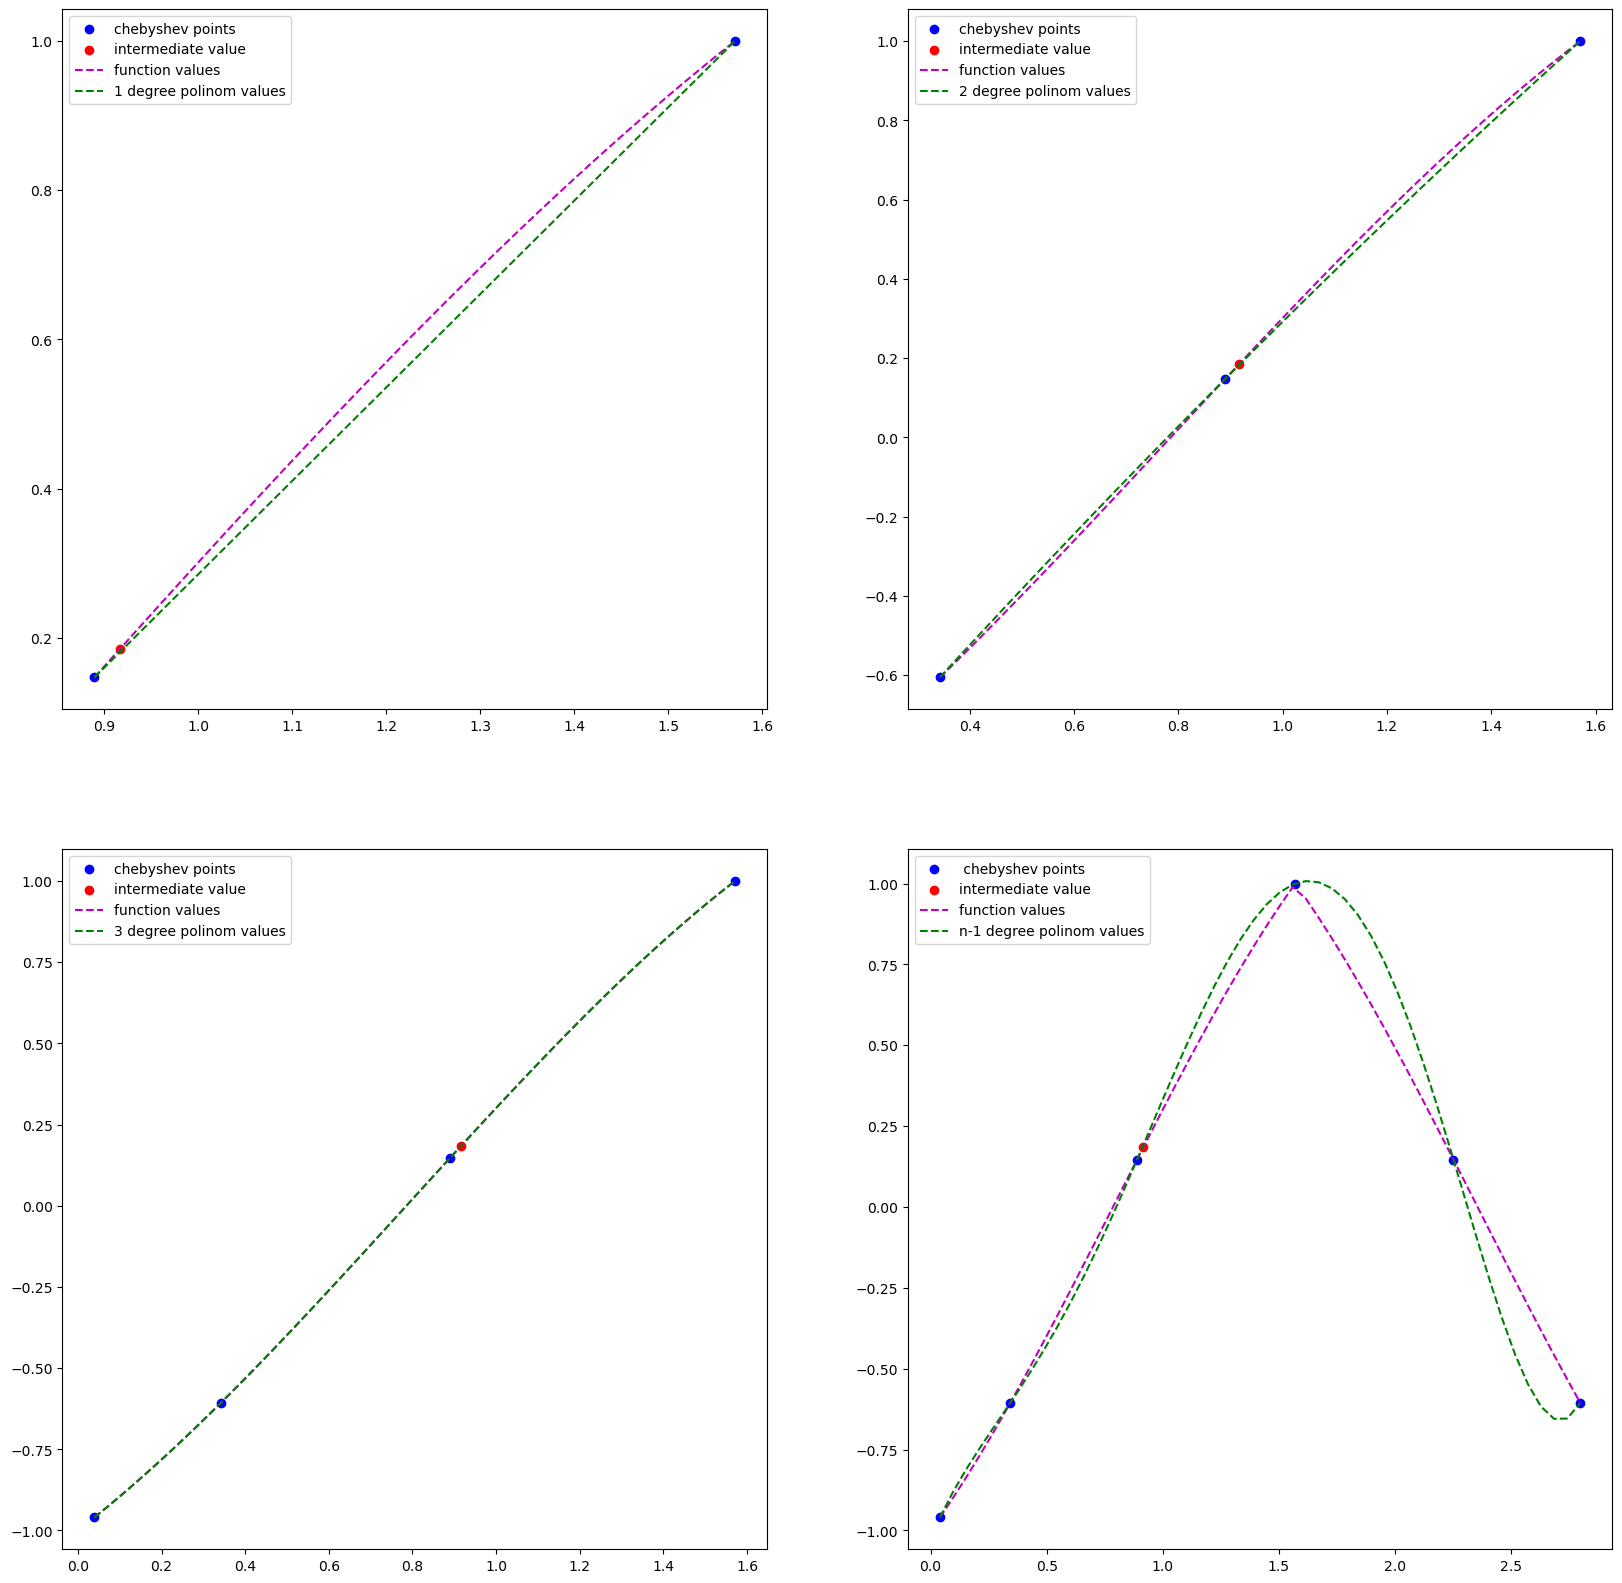

In [485]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
axs[0, 0].scatter(x_cheb[interval1], y_cheb[interval1], color='b', label='chebyshev points')
axs[0, 0].scatter(x_interm[idx], y_interm[idx], color='r', label='intermediate value')
axs[0, 0].plot(x_t:=np.linspace(x_cheb[2], x_cheb[idx+2]), f(x_t), '--', color='m', label='function values')
axs[0, 0].plot(x_t, lp1(x_t), '--', color='g', label='1 degree polinom values')
axs[0, 0].legend();

axs[0, 1].scatter(x_cheb[interval2], y_cheb[interval2], color='b', label='chebyshev points')
axs[0, 1].scatter(x_interm[idx], y_interm[idx], color='r', label='intermediate value')
axs[0, 1].plot(x_t:=np.linspace(x_cheb[1], x_cheb[idx+2]), f(x_t), '--', color='m', label='function values')
axs[0, 1].plot(x_t, lp2(x_t), '--', color='g', label='2 degree polinom values')
axs[0, 1].legend();

axs[1, 0].scatter(x_cheb[interval3], y_cheb[interval3], color='b', label='chebyshev points')
axs[1, 0].scatter(x_interm[idx], y_interm[idx], color='r', label='intermediate value')
axs[1, 0].plot(x_t:=np.linspace(x_cheb[0], x_cheb[idx+2]), f(x_t), '--', color='m', label='function values')
axs[1, 0].plot(x_t, lp3(x_t), '--', color='g', label='3 degree polinom values')
axs[1, 0].legend();

axs[1, 1].scatter(x_cheb[intervalf], y_cheb[intervalf], color='b', label=' chebyshev points')
axs[1, 1].scatter(x_interm[idx], y_interm[idx], color='r', label='intermediate value')
axs[1, 1].plot(x_t:=np.linspace(x_cheb[0], x_cheb[-2]), f(x_t), '--', color='m', label='function values')
axs[1, 1].plot(x_t, lpf(x_t), '--', color='g', label='n-1 degree polinom values')
axs[1, 1].legend();

In [486]:
params = ['a', 'b', 'c', 'd']
y_interm_cs, *coefs = cubic_spline(x, y, x_interm)
print(f'intemediate point {idx} value: {y_interm[idx]}\n')
print(f'y value in point {idx}: {y_interm_cs[idx]}\n')
print(f'absolute error: {abs(y_interm_cs[idx]-y_interm[idx])}')
print(f'relative error: {abs(y_interm_cs[idx]-y_interm[idx])/y_interm[idx]*100}%\n\n')
for param, coef in zip(params, coefs): print(f'param: {param}, coef: {np.round(coef, 3)}')

intemediate point 1 value: 0.1845919112825145

y value in point 1: 0.16114459414740262

absolute error: 0.02344731713511189
relative error: 12.702245170009755%


param: a, coef: [-1.    -0.366  0.366  1.     0.366 -0.366]
param: b, coef: [ 1.193  1.247  1.645  0.    -1.645 -1.247]
param: c, coef: [ 0.     0.105  0.655 -3.796  0.655  0.105  0.   ]
param: d, coef: [ 0.067  0.35  -2.833  2.833 -0.35  -0.067]


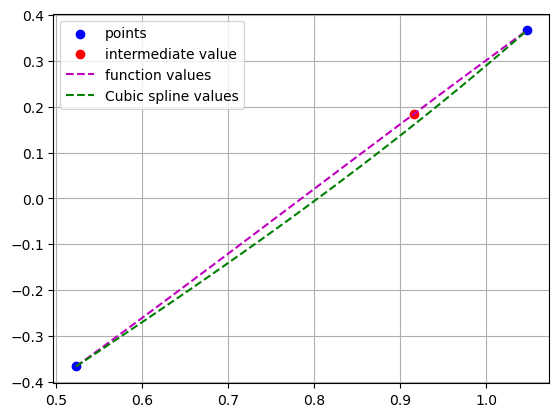

In [487]:
interval1 = slice(1, idx+2)
plt.scatter(x[interval1], y[interval1], color='b', label='points')
plt.scatter(x_interm[idx], y_interm[idx], color='r', label='intermediate value')
plt.plot(x_t:=np.linspace(x[1], x[idx+1]), f(x_t), '--', color='m', label='function values')
plt.plot(x_t, cubic_spline(x, y, x_t)[0], '--', color='g', label='Cubic spline values')
plt.grid()
plt.legend();

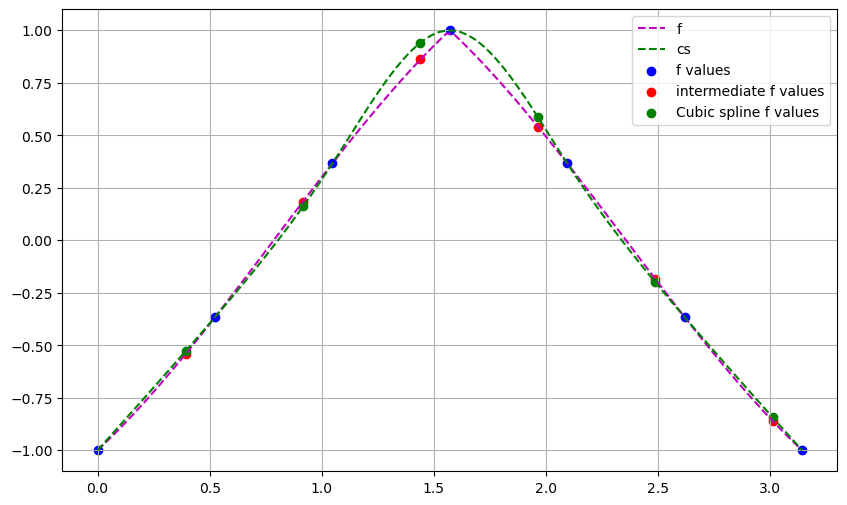

In [488]:
plt.figure(figsize=(10, 6))
plt.plot(x_, y_, '--', color='m', label='f')
plt.plot(x_, cubic_spline(x, y, x_)[0], '--', color='g', label='cs')
plt.scatter(x, y, color='b', label='f values')
plt.scatter(x_interm, y_interm, color='r', label='intermediate f values')
plt.scatter(x_interm, y_interm_cs, color='g', label='Cubic spline f values')
plt.grid()
plt.legend();

In [489]:
interval1 = slice(2, idx+3)
y_interm_cs_cheb, *coefs = cubic_spline(x_cheb, y_cheb, x_interm)
print(f'intemediate point {idx} value: {y_interm[idx]}\n')
print(f'y value in point {idx}: {y_interm_cs_cheb[idx]}\n')
print(f'absolute error: {abs(y_interm_cs_cheb[idx]-y_interm[idx])}')
print(f'relative error: {abs(y_interm_cs_cheb[idx]-y_interm[idx])/y_interm[idx]*100}%\n\n')
for param, coef in zip(params, coefs): print(f'param: {param}, coef: {np.round(coef, 3)}')

intemediate point 1 value: 0.1845919112825145

y value in point 1: 0.19140107889405947

absolute error: 0.006809167611544958
relative error: 3.688768139533294%


param: a, coef: [-0.96  -0.606  0.147  1.     0.147 -0.606]
param: b, coef: [ 1.152  1.198  1.639 -0.015 -1.641 -1.187]
param: c, coef: [ 0.     0.152  0.678 -3.061  0.675  0.099  0.   ]
param: d, coef: [ 0.167  0.321 -1.829  1.827 -0.351 -0.109]


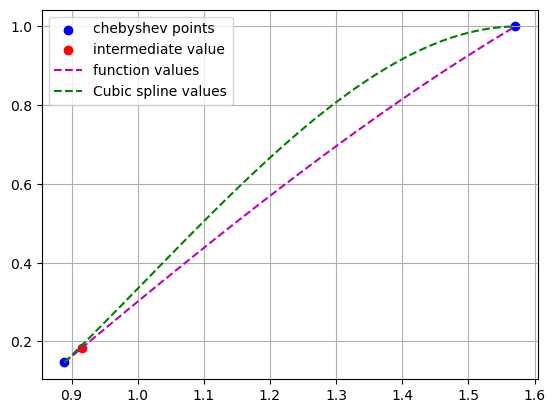

In [490]:
plt.scatter(x_cheb[interval1], y_cheb[interval1], color='b', label='chebyshev points')
plt.scatter(x_interm[idx], y_interm[idx], color='r', label='intermediate value')
plt.plot(x_t:=np.linspace(x_cheb[2], x_cheb[idx+2]), f(x_t), '--', color='m', label='function values')
plt.plot(x_t, cubic_spline(x_cheb, y_cheb, x_t)[0], '--', color='g', label='Cubic spline values')
plt.grid()
plt.legend();

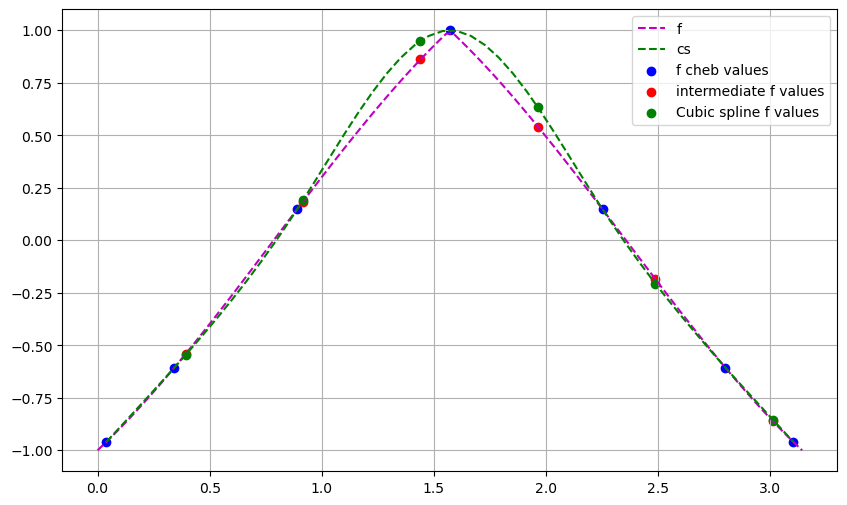

In [491]:
plt.figure(figsize=(10, 6))
plt.plot(x_, y_, '--', color='m', label='f')
plt.plot(x_t:=np.linspace(x_cheb[0], x_cheb[-1]), cubic_spline(x_cheb, y_cheb, x_t)[0], '--', color='g', label='cs')
plt.scatter(x_cheb, y_cheb, color='b', label='f cheb values')
plt.scatter(x_interm, y_interm, color='r', label='intermediate f values')
plt.scatter(x_interm, y_interm_cs_cheb, color='g', label='Cubic spline f values')
plt.grid()
plt.legend();